In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("DataSet.xlsx",engine="openpyxl")

Load the data

In [2]:
df.shape

(1107, 19)

In [3]:
print(df.head())

        Date  Coal_RB_4800_FOB_London_Close_USD  \
0 2020-04-02                              41.00   
1 2020-04-03                              40.34   
2 2020-04-06                              40.34   
3 2020-04-07                              40.34   
4 2020-04-08                              40.34   

   Coal_RB_5500_FOB_London_Close_USD  Coal_RB_5700_FOB_London_Close_USD  \
0                              53.22                               64.7   
1                              52.36                               63.1   
2                              52.36                               63.1   
3                              52.36                               63.1   
4                              52.36                               63.1   

   Coal_RB_6000_FOB_CurrentWeek_Avg_USD  Coal_India_5500_CFR_London_Close_USD  \
0                                 97.56                                 60.50   
1                                 70.57                                 62.03   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  1107 non-null   datetime64[ns]
 1   Coal_RB_4800_FOB_London_Close_USD     1068 non-null   float64       
 2   Coal_RB_5500_FOB_London_Close_USD     1068 non-null   float64       
 3   Coal_RB_5700_FOB_London_Close_USD     1068 non-null   float64       
 4   Coal_RB_6000_FOB_CurrentWeek_Avg_USD  1084 non-null   float64       
 5   Coal_India_5500_CFR_London_Close_USD  1068 non-null   float64       
 6   Price_WTI                             1099 non-null   float64       
 7   Price_Brent_Oil                       1096 non-null   float64       
 8   Price_Dubai_Brent_Oil                 1067 non-null   float64       
 9   Price_ExxonMobil                      1067 non-null   float64       
 10  

In [5]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Date                                     0
Coal_RB_4800_FOB_London_Close_USD       39
Coal_RB_5500_FOB_London_Close_USD       39
Coal_RB_5700_FOB_London_Close_USD       39
Coal_RB_6000_FOB_CurrentWeek_Avg_USD    23
Coal_India_5500_CFR_London_Close_USD    39
Price_WTI                                8
Price_Brent_Oil                         11
Price_Dubai_Brent_Oil                   40
Price_ExxonMobil                        40
Price_Shenhua                           65
Price_All_Share                         49
Price_Mining                            49
Price_LNG_Japan_Korea_Marker_PLATTS     41
Price_ZAR_USD                            0
Price_Natural_Gas                        8
Price_ICE                               40
Price_Dutch_TTF                         31
Price_Indian_en_exg_rate                60
dtype: int64


In [6]:
n_col=df.select_dtypes(include=[np.number]).columns.tolist()
n_col

['Coal_RB_4800_FOB_London_Close_USD',
 'Coal_RB_5500_FOB_London_Close_USD',
 'Coal_RB_5700_FOB_London_Close_USD',
 'Coal_RB_6000_FOB_CurrentWeek_Avg_USD',
 'Coal_India_5500_CFR_London_Close_USD',
 'Price_WTI',
 'Price_Brent_Oil',
 'Price_Dubai_Brent_Oil',
 'Price_ExxonMobil',
 'Price_Shenhua',
 'Price_All_Share',
 'Price_Mining',
 'Price_LNG_Japan_Korea_Marker_PLATTS',
 'Price_ZAR_USD',
 'Price_Natural_Gas',
 'Price_ICE',
 'Price_Dutch_TTF',
 'Price_Indian_en_exg_rate']

Measures of central tendency(mean,median,mode)

In [7]:
for c in n_col:
    s= df[c].fillna(df[c].mean())     

In [8]:
print("Mean")
s.mean

Mean


<bound method Series.mean of 0       141.616027
1        45.020000
2       141.616027
3        48.320000
4        45.750000
           ...    
1102    182.690000
1103    179.470000
1104    178.680000
1105    179.830000
1106    180.540000
Name: Price_Indian_en_exg_rate, Length: 1107, dtype: float64>

In [9]:
print("Median")
s.median()

Median


np.float64(141.61602674307542)

In [10]:
print("Mode")
s.mode()

Mode


0    141.616027
Name: Price_Indian_en_exg_rate, dtype: float64

Measures of dispersion (variance, standard deviation, range)

In [11]:
print("Variance")
s.var()

Variance


np.float64(2772.8735664297024)

In [12]:
print("Standard deviation")
s.std()

Standard deviation


np.float64(52.65808168201442)

Skewness:

In [13]:
s.skew()

np.float64(0.38173782231619985)

Kurtosis:

In [14]:
s.kurt()

np.float64(0.0757831372174067)

Visualization:

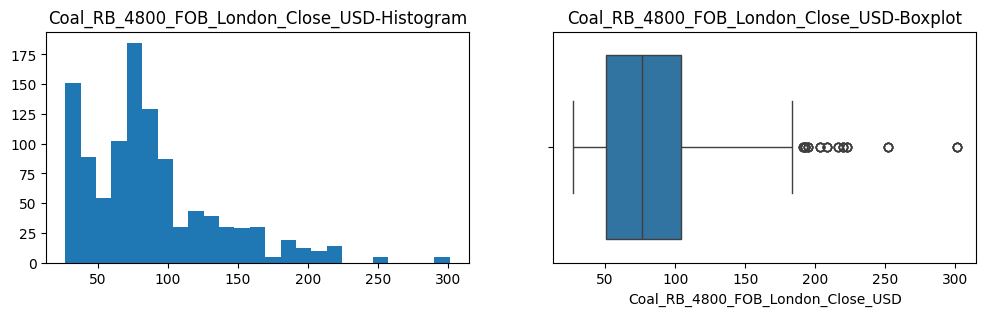

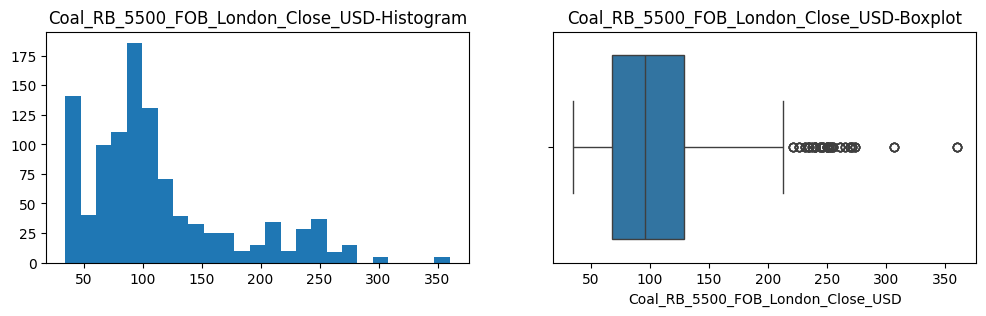

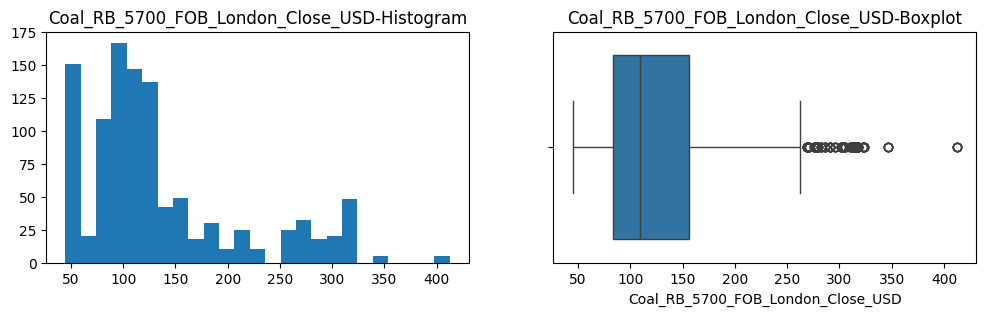

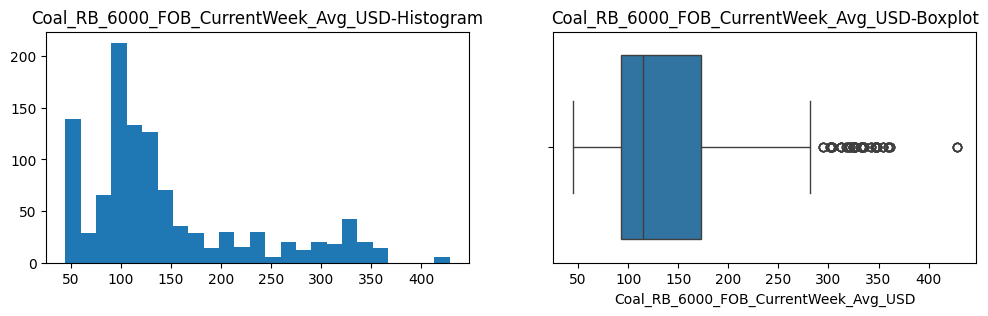

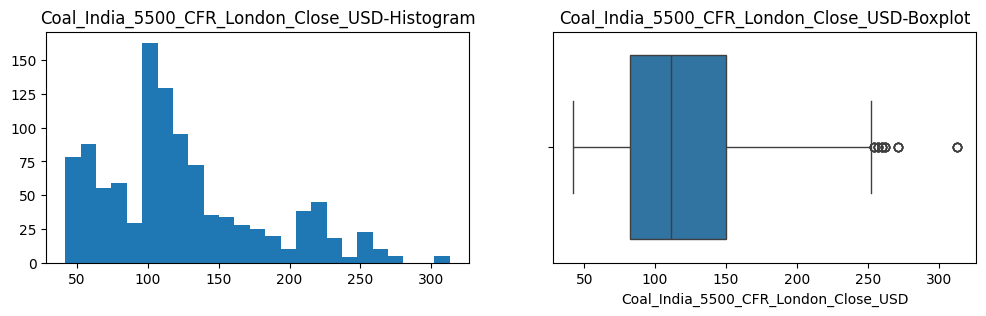

In [15]:
for c in n_col[:5]:
    s=df[c].dropna()
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    plt.title(f"{c}-Histogram")
    plt.hist(s,bins=25)

    plt.subplot(1,2,2)
    plt.title(f"{c}-Boxplot")
    sns.boxplot(x=s)


SQL:

In [16]:
# 1. read excel
df = pd.read_excel('DataSet.xlsx', sheet_name=0) 

In [17]:
# 2. create sqlite database and push table
from sqlalchemy import create_engine
engine = create_engine('sqlite:///mydata.db')   
df.to_sql('my_data', engine, if_exists='replace', index=False)


1107

In [18]:
df.head()

,Date,Coal_RB_4800_FOB_London_Close_USD,Coal_RB_5500_FOB_London_Close_USD,Coal_RB_5700_FOB_London_Close_USD,Coal_RB_6000_FOB_CurrentWeek_Avg_USD,Coal_India_5500_CFR_London_Close_USD,Price_WTI,Price_Brent_Oil,Price_Dubai_Brent_Oil,Price_ExxonMobil,Price_Shenhua,Price_All_Share,Price_Mining,Price_LNG_Japan_Korea_Marker_PLATTS,Price_ZAR_USD,Price_Natural_Gas,Price_ICE,Price_Dutch_TTF,Price_Indian_en_exg_rate
0,2020-04-02,41.00,53.22,64.7,97.56,60.50,25.32,29.94,26.16,40.40,14.58,45060.69,35562.37,2.860,0.05411,1.552,81.14,6.935,NaN
1,2020-04-03,40.34,52.36,63.1,70.57,62.03,28.34,34.11,29.39,39.21,14.14,44598.70,35258.30,2.845,0.05245,1.621,80.99,6.920,45.02
2,2020-04-06,40.34,52.36,63.1,70.57,62.03,26.08,33.05,27.45,40.47,14.26,46240.35,37032.31,2.850,0.05351,1.731,84.43,7.285,NaN
3,2020-04-07,40.34,52.36,63.1,70.57,62.03,23.63,31.87,26.00,41.24,14.46,47496.72,38362.12,2.805,0.05457,1.852,82.30,7.285,48.32
4,2020-04-08,40.34,52.36,63.1,70.57,62.03,25.09,32.84,26.16,43.85,14.24,46689.90,37469.17,2.810,0.05493,1.783,85.34,7.260,45.75


In [19]:
#To import SQL extension
%reload_ext sql
%sql sqlite:///mydata.db

Measures the central tendency (mean,median and mode)

Measures of dispersion (variance, standard deviation)

In [20]:
import sqlite3
conn = sqlite3.connect("mydata.db")

In [21]:

#mean
a='''
SELECT AVG(Price_WTI) AS mean_price
FROM my_data
WHERE Price_WTI IS NOT NULL;'''
result = conn.execute(a).fetchone()
print("Mean Price:",result[0])

Mean Price: 72.34546860782531


In [22]:
#median
ans= '''SELECT Price_WTI AS median_price
FROM my_data
WHERE Price_WTI IS NOT NULL
ORDER BY Price_WTI
LIMIT 1
OFFSET (SELECT COUNT(*) FROM my_data WHERE Price_WTI IS NOT NULL) / 2;'''
result = conn.execute(ans).fetchone()
print("Median Price:",result[0])


Median Price: 75.67


In [23]:
#Mode
b='''SELECT Price_WTI, COUNT(*) AS freq
FROM my_data
GROUP BY Price_WTI
LIMIT 1;'''
result = conn.execute(b).fetchone()
print("Mode Price:", result[0])


Mode Price: None


Measures of dispersion (variance, standard deviation)

In [24]:
#Variance
c='''SELECT AVG((Price_WTI - (SELECT AVG(Price_WTI) FROM my_data))*(Price_WTI - (SELECT AVG(Price_WTI) 
FROM my_data)))AS variance_price
FROM my_data
WHERE PRICE_WTI IS NOT NULL;'''
result = conn.execute(c).fetchone()
print("Variance:", result[0])

Variance: 424.19678310615745


In [25]:
query = """
SELECT 
    AVG((Price_WTI - (SELECT AVG(Price_WTI) FROM my_data))*(Price_WTI - (SELECT AVG(Price_WTI)
    FROM my_data))) AS variance_price,
    SQRT(AVG((Price_WTI - (SELECT AVG(Price_WTI) FROM my_data))*(Price_WTI - (SELECT AVG(Price_WTI) 
    FROM my_data)))) AS std_dev_price
FROM my_data
WHERE Price_WTI IS NOT NULL;
"""
result = conn.execute(query).fetchone()
print("Standard Deviation:", result[1])


Standard Deviation: 20.596038043909257


Skewness and kurtosis

In [26]:
#Skewness
answer='''SELECT 
  AVG((Price_WTI - avg_val)*(Price_WTI - avg_val)*(Price_WTI - avg_val)) / 
  (POWER(AVG((Price_WTI - avg_val)*(Price_WTI - avg_val)), 1.5)) AS skewness
FROM my_data, (SELECT AVG(Price_WTI) AS avg_val FROM my_data);'''
result = conn.execute(answer).fetchone()
print("Skewness:",result[0])

Skewness: -0.5356163224682481


In [27]:
#Kurtosis:
q='''SELECT 
  AVG(POWER((PRICE_WTI - avg_val), 4)) / POWER(AVG(POWER((PRICE_WTI - avg_val), 2)), 2) - 3 AS kurtosis
FROM my_data, (SELECT AVG(PRICE_WTI) AS avg_val FROM my_data);'''
result = conn.execute(q).fetchone()
print("kurtosis:",result[0])

kurtosis: 0.7991610780682588


Dashboard :

In [28]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

Select Column :

In [29]:
#For Single Columns :
col_dropdown = widgets.Dropdown(options=df.columns, description="Column:")
display(col_dropdown)

Dropdown(description='Column:', options=('Date', 'Coal_RB_4800_FOB_London_Close_USD', 'Coal_RB_5500_FOB_London…

Visualization :

In [30]:
def show(column):
    # Histogram
    fig_histo = px.histogram(df, x=column, title=f" Histogram for {column} ")
    fig_histo.show()
    
    # Box Plot
    fig_box = px.box(df, y=column, title=f" Box Plot of {column} ")
    fig_box.show()

    #Violin Plot
    fig_vio=px.violin(df, y=column, title= f"Violin Plot of {column}")
    fig_vio.show()

widgets.interact(show, column=col_dropdown)

interactive(children=(Dropdown(description='Column:', options=('Date', 'Coal_RB_4800_FOB_London_Close_USD', 'C…

<function __main__.show(column)>

In [31]:
#For multiple columns:
x_dropdown = widgets.Dropdown(options=df.columns, description="X-axis:")
y_dropdown = widgets.Dropdown(options=df.columns, description="Y-axis:")
display(x_dropdown, y_dropdown)

Dropdown(description='X-axis:', options=('Date', 'Coal_RB_4800_FOB_London_Close_USD', 'Coal_RB_5500_FOB_London…

Dropdown(description='Y-axis:', options=('Date', 'Coal_RB_4800_FOB_London_Close_USD', 'Coal_RB_5500_FOB_London…

In [32]:
def plot(x, y):
    #Scatter Plot :
    fig = px.scatter(df, x=x, y=y, title=f"Scatter plot of {y} vs {x}")
    fig.show()

    #Line plot
    fig=px.line(df, x=x, y=y, title=f"Line Plot of {y} vs {x} ")
    fig.show()

    #Bar Chart:
    fig=px.bar(df, x=x, y=y, title=f"Bar Chart of {x} vs {y}")
    fig.show()

widgets.interact(plot, x=x_dropdown, y=y_dropdown)

interactive(children=(Dropdown(description='X-axis:', options=('Date', 'Coal_RB_4800_FOB_London_Close_USD', 'C…

<function __main__.plot(x, y)>

In [35]:
from scipy import stats
from ipywidgets import interact, Dropdown, Checkbox, VBox
data = pd.read_excel("DataSet.xlsx")  
data.head()


,Date,Coal_RB_4800_FOB_London_Close_USD,Coal_RB_5500_FOB_London_Close_USD,Coal_RB_5700_FOB_London_Close_USD,Coal_RB_6000_FOB_CurrentWeek_Avg_USD,Coal_India_5500_CFR_London_Close_USD,Price_WTI,Price_Brent_Oil,Price_Dubai_Brent_Oil,Price_ExxonMobil,Price_Shenhua,Price_All_Share,Price_Mining,Price_LNG_Japan_Korea_Marker_PLATTS,Price_ZAR_USD,Price_Natural_Gas,Price_ICE,Price_Dutch_TTF,Price_Indian_en_exg_rate
0,2020-04-02,41.00,53.22,64.7,97.56,60.50,25.32,29.94,26.16,40.40,14.58,45060.69,35562.37,2.860,0.05411,1.552,81.14,6.935,NaN
1,2020-04-03,40.34,52.36,63.1,70.57,62.03,28.34,34.11,29.39,39.21,14.14,44598.70,35258.30,2.845,0.05245,1.621,80.99,6.920,45.02
2,2020-04-06,40.34,52.36,63.1,70.57,62.03,26.08,33.05,27.45,40.47,14.26,46240.35,37032.31,2.850,0.05351,1.731,84.43,7.285,NaN
3,2020-04-07,40.34,52.36,63.1,70.57,62.03,23.63,31.87,26.00,41.24,14.46,47496.72,38362.12,2.805,0.05457,1.852,82.30,7.285,48.32
4,2020-04-08,40.34,52.36,63.1,70.57,62.03,25.09,32.84,26.16,43.85,14.24,46689.90,37469.17,2.810,0.05493,1.783,85.34,7.260,45.75


In [45]:
def dashboard(column, show_hist=True, show_box=True):
    # Only work with numeric columns
    numeric_data = data[column].dropna()
    
    
    # Calculate statistics
    mean_val = numeric_data.mean()
    median_val = numeric_data.median()
    mode_val = numeric_data.mode()[0]
    std_val = numeric_data.std()
    skew_val = stats.skew(numeric_data)
    kurt_val = stats.kurtosis(numeric_data)
    
    # Display stats
    print(f"**Selected Column:** {column}")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Standard Deviation: {std_val}")
    print(f"Skewness: {skew_val}")
    print(f"Kurtosis: {kurt_val}")
    
    # Plot histogram
    if show_hist:
        plt.figure(figsize=(10,4))
        sns.histplot(numeric_data, color='skyblue')
        plt.title(f'Histogram of {column}')
        plt.show()
    
    # Plot boxplot
    if show_box:
        plt.figure(figsize=(6,4))
        sns.boxplot(y=numeric_data, color='lightgreen')
        plt.title(f'Boxplot of {column}')
        plt.show()



In [46]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

interact(
    dashboard,
    column=Dropdown(options=numeric_cols, description="Select Column:"),
    show_hist=Checkbox(value=True, description="Show Histogram"),
    show_box=Checkbox(value=True, description="Show Boxplot")
);


interactive(children=(Dropdown(description='Select Column:', options=('Coal_RB_4800_FOB_London_Close_USD', 'Co…